## Background and research motivation

The U.S. Small Business Administration(SBA), which came out of the response of the Great Depression and World War II has been helping small business establishment since 1953 in the U.S. The main function as of Small Business Act of 1953, was to "aid, counsel, assist and protect, insofar as is possible, the interests of small business concerns". 
SBA is providing assistance to small business establishment by providing easier access to the capital market via loan guarantees, contracts and counseling. The loan guarantee program has encouraged many banks to grant small business loans which has helped to access capital markets by millions of small business owners throughout the country.

As we are in the midst of COVID-19, main quest remained in this unprecedented time is how to survive. The pandemic continues to take its toll at nation's economy and government's major effort has been concentrated towards stymieing the spread of virus. Another reality is that almost one-third of small business were not able to survive during the COVID-19 pandemic. 

Small businesses has been one of the leading sector in job creation and sparking innovation. These sector generates abouts 50 percent of the gross domestic product(GDP). Being one of the prominent sector for the countrie's economy, government has taken steps to relieve the pain of pandemic loss among 31.7 million small business in the U.S. The Coronavirus Aid, Relief, and Economic Security (CARES) Act that was passed on March 2020 has aimed to help small business by providing loan to maintain the payroll. The CARES Act set aside $669 billion for the relief of small business to be administered by the SBA as PPP. After the implementation of PPP, there has been huge upsurge in loan application and initial funding arrangements has exhausted and they came up with second round of relief package.  

Considering the fact of immense importance of SBA loans and present pandemic, I was curious to see how the loan applicant has been ended up as default? So, my primary goal in this study was to find the major factors that plays an important role in making the loan default. This study will help in decision making by the financial agencies on which applicants loan should they approve?


--------------------------------------------------

https://www.sba.gov/about-sba/organization

https://www.forbes.com/sites/maneetahuja/2021/08/02/insights-on-the-five-stages-of-small-business-growth/?sh=1d43a08f630b

https://open.lib.umn.edu/exploringbusiness/chapter/5-2-the-importance-of-small-business-to-the-u-s-economy/

https://www.americanactionforum.org/research/tracker-paycheck-protection-program-loans/

## Importing libraries and dataframe



In [3]:
# Basic Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
# additional plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
# set display options
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows', 150)

# other
from collections import Counter
import missingno as msno # checking the null
import json # for usa map

In [195]:
#Model Evaluation:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, log_loss, make_scorer, precision_recall_curve
import scikitplot as skplt
from sklearn.datasets import make_classification
#Modeling Algoritms:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm
#Balancing the Dataset:
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

In [5]:
df = pd.read_csv("E:/Bootcamp/Thinkful/Thinkful Modules/23 Capstone Supervised Learning/Data/SBA_Loan/SBAnational.csv", low_memory=False)

## Dataframe overview and variable description


The dataset has been retrieved from kaggle. The dataset consists of historical loan data for SBA. The date range is from 1968 to 2014 with 899164 observations and 27 variables. The variables are described as follows:


In [6]:
# checking the dataframe what is in it?
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [7]:
df.shape

(899164, 27)

In [8]:
df.columns.tolist()

['LoanNr_ChkDgt',
 'Name',
 'City',
 'State',
 'Zip',
 'Bank',
 'BankState',
 'NAICS',
 'ApprovalDate',
 'ApprovalFY',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'ChgOffDate',
 'DisbursementDate',
 'DisbursementGross',
 'BalanceGross',
 'MIS_Status',
 'ChgOffPrinGr',
 'GrAppv',
 'SBA_Appv']

 **Brief description of each variables**
 
* *LoanNr_ChkDgt* **-:** Identification Number for Each Loan Case
* *Name* **-:** Borrower Name
* *City* **-:** Borrower City
* *State* **-:** Borrower State
* *Zip* **-:** Borrower Zip Code
* *Bank* **-:** Bank Name
* *BankState* **-:** Bank State
* *NAICS* **-:** North American Industry Classification System Code
* *ApprovalDate* **-:** Date SBA Commitment Issued
* *ApprovalFY* **-:** Fiscal Year of Commitment
* *Term* **-:** Loan Term in Months
* *NoEmp* **-:** Number of Business' Employees
* *NewExist* **-:** New or Existing Business (1 = existing,0 = new)
* *CreateJob* **-:** Total Jobs Created by Business
* *RetainedJob* **-:** Number of Jobs Retained
* *FranchiseCode* **-:** Franchise Code (00000 or 00001) = No Franchise
* *UrbanRural* **-:** Location of Business (1 = Urban, 2 = Rural, 0 = Undefined)
* *RevLineCR* **-:** Revolving Line of Credit (Y = Yes, N = No)
* *LowDoc* **-:** LowDoc Loan Program (Smaller Loan with smaller application and expidited processing time, Y = Yes, N = No)
* *ChgOffDate* **-:** The Date when the Loan is Declared to be in Default
* *DisbursementDate* **-:** Disbursement Date
* *DisbursementGross* **-:** Amount Disbursed
* *BalanceGross* **-:** Gross Amount Outstanding
* *MIS_Status* **-:** Loan Status (CHGOFF = Charged off, PIF = Paid in Full)
* *ChgOffPrinGr* **-:** Charged-off Amount
* *GrAppv* **-:** Gross Amount of Loan Approved by bank
* *SBA_Appv* **-:** Amount guaranteed by SBA


In [9]:
# What are the null values in the data
df.isna().sum().sort_values(ascending = False)

# Outcome: ChgOffDate has extensive null values followed by RevLineCr and LowDoc

ChgOffDate           736465
RevLineCr              4528
LowDoc                 2582
DisbursementDate       2368
MIS_Status             1997
BankState              1566
Bank                   1559
NewExist                136
City                     30
State                    14
Name                     14
LoanNr_ChkDgt             0
GrAppv                    0
ChgOffPrinGr              0
BalanceGross              0
DisbursementGross         0
CreateJob                 0
UrbanRural                0
FranchiseCode             0
RetainedJob               0
NoEmp                     0
Term                      0
ApprovalFY                0
ApprovalDate              0
NAICS                     0
Zip                       0
SBA_Appv                  0
dtype: int64

In [10]:
# checking the descriptive statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.0,4.772612e+09,2.538175e+09,1.000014e+09,2.589758e+09,4.361439e+09,6.904627e+09,9.996003e+09
Zip,899164.0,5.380439e+04,3.118416e+04,0.000000e+00,2.758700e+04,5.541000e+04,8.370400e+04,9.999900e+04
NAICS,899164.0,3.986610e+05,2.633183e+05,0.000000e+00,2.352100e+05,4.453100e+05,5.617300e+05,9.281200e+05
Term,899164.0,1.107731e+02,7.885731e+01,0.000000e+00,6.000000e+01,8.400000e+01,1.200000e+02,5.690000e+02
NoEmp,899164.0,1.141135e+01,7.410820e+01,0.000000e+00,2.000000e+00,4.000000e+00,1.000000e+01,9.999000e+03
NewExist,899028.0,1.280404e+00,4.517500e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CreateJob,899164.0,8.430376e+00,2.366882e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
RetainedJob,899164.0,1.079726e+01,2.371206e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,9.500000e+03
FranchiseCode,899164.0,2.753726e+03,1.275802e+04,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999900e+04
UrbanRural,899164.0,7.577483e-01,6.464360e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [11]:
# Let's check the MIS_Status which is our dependent variable
Counter(df['MIS_Status'])

# It shows there are 1997 null values

Counter({'P I F': 739609, 'CHGOFF': 157558, nan: 1997})

NAICS: https://www.census.gov/naics/?58967?yearbck=2017

**Sector number & Definition**

11 Agriculture, Forestry, Fishing and Hunting

21 Mining, Quarrying, and Oil and Gas Extraction

22 Utilities

23 Construction

31-33 Manufacturing

42 Wholesale Trade

44-45 Retail Trade

48-49 Transportation and Warehousing

51 Information

52 Finance and Insurance

53 Real Estate and Rental and Leasing

54 Professional, Scientific, and Technical Services

55 Management of Companies and Enterprises

56 Administrative and Support and Waste Management and Remediation Services

61 Educational Services

62 Health Care and Social Assistance

71 Arts, Entertainment, and Recreation

72 Accommodation and Food Services

81 Other Services (except Public Administration)

92 Public Administration

<AxesSubplot:>

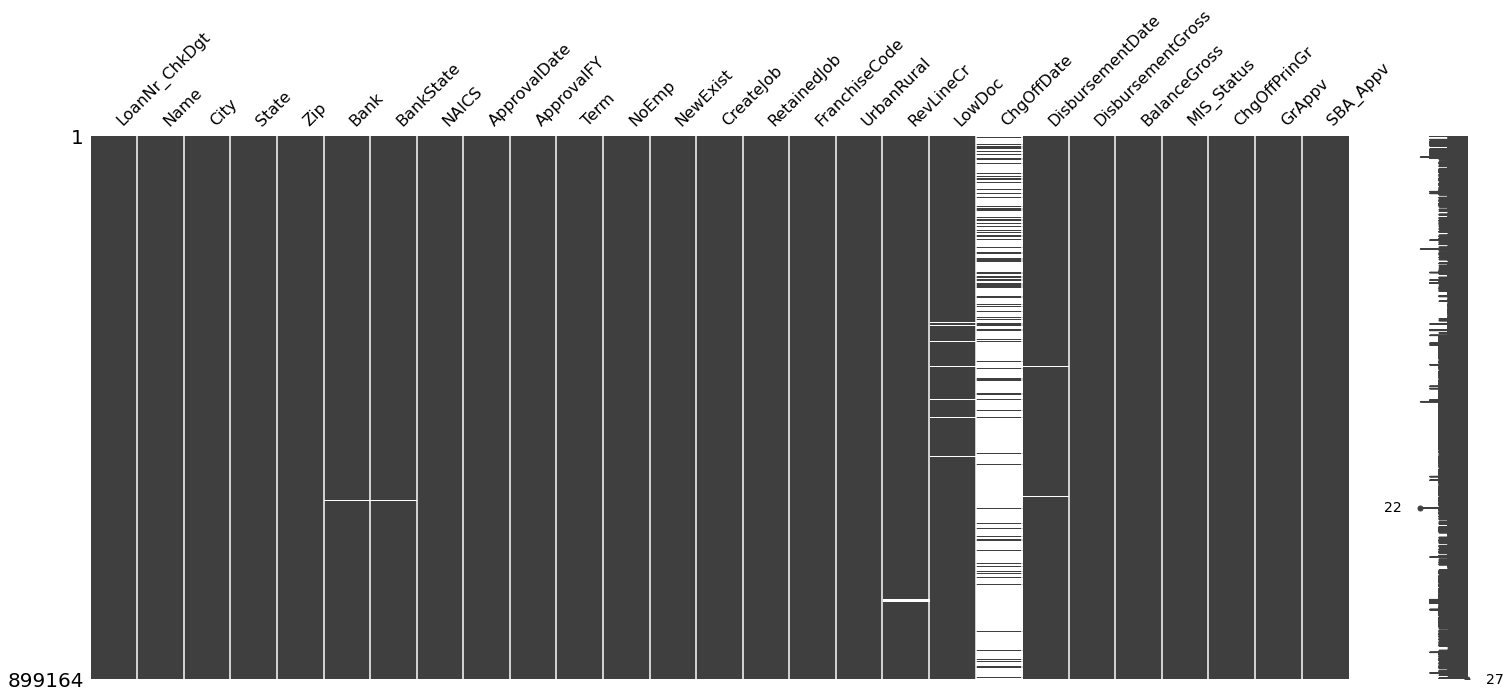

In [12]:
# Lets visualise the missing values in the df
msno.matrix(df)

#outcome: We can see that Bank, BankState, RevLineCr, ChgOffDate and DisbursementDate have missing values.

## Data cleaning and EDA

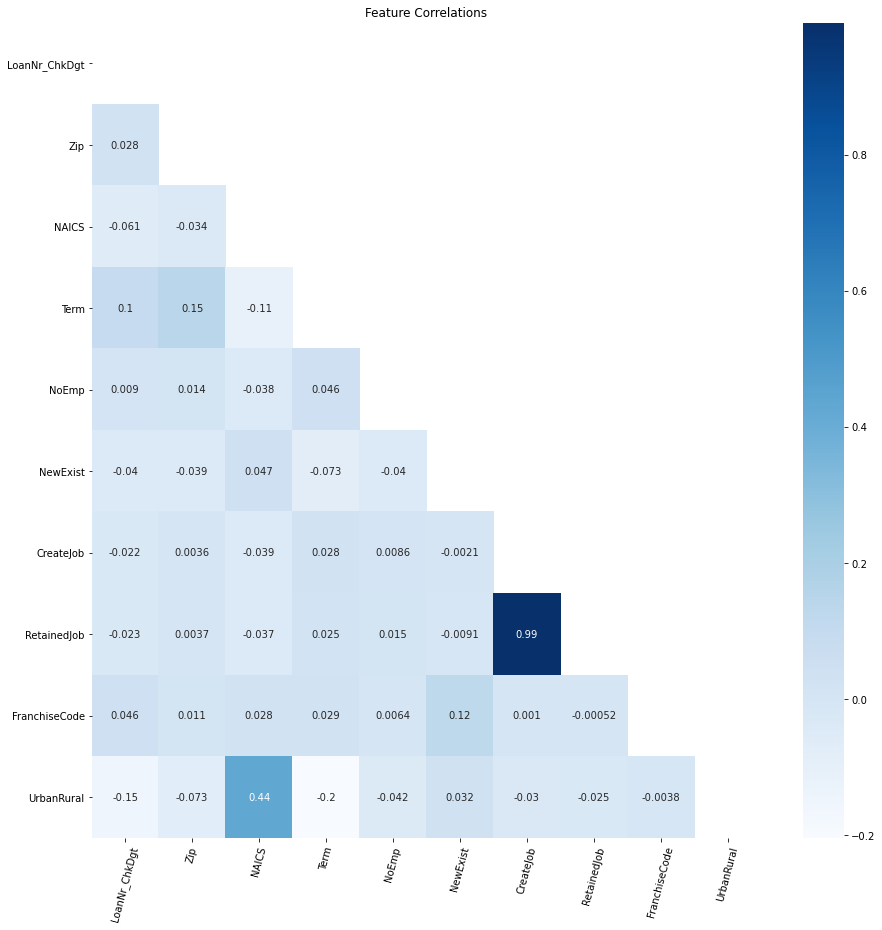

In [13]:
# correlation matrix of the features
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, ax=ax, mask=mask, cmap = "Blues").set(title='Feature Correlations')
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.show()

# need to remove one of retainedjob or createjob

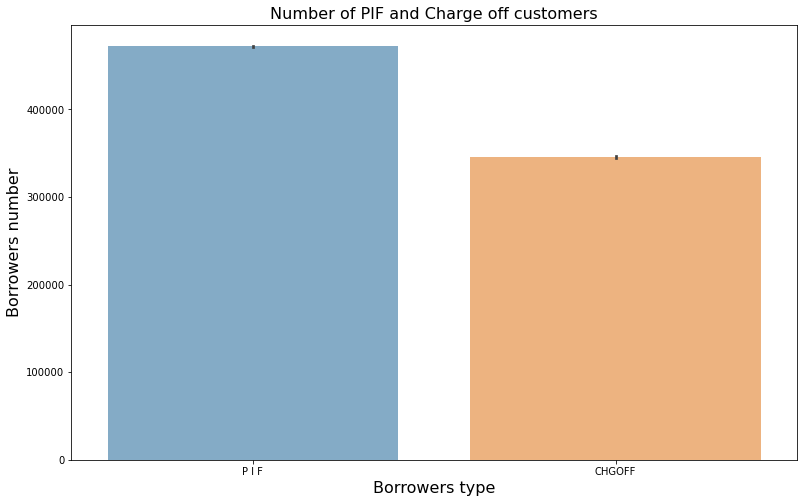

In [25]:
# checking the target variable
plt.figure(figsize=(13,8))
sns.barplot(y= df.State.index, x=df.MIS_Status.values, alpha=0.6)
plt.title("Number of PIF and Charge off customers", fontsize=16)
plt.xlabel("Borrowers type", fontsize=16)
plt.ylabel("Borrowers number", fontsize=16)
plt.show()

In [14]:
# pie chart of the MIS_Status
payer_type= df['MIS_Status'].value_counts()
labels = (np.array(payer_type.index))
values = (np.array((payer_type/ payer_type.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title="Payers Type"
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="MIS_Status")


In [15]:
# copying the df to proceed further
df1 = df.copy()

In [16]:
# cleaning the dependent variable, removing null values
df1.dropna(subset = ['MIS_Status'], inplace = True)

In [17]:
# what changes has been made so far

print(df1.shape)
print(df.shape)

(897167, 27)
(899164, 27)


In [18]:
# Extracting first two digits of the NCAICS

df1['sector'] = df1.NAICS.astype(str).str[:2].astype(int)

In [19]:
#Map NAICS codes to industries
ind_dict = {11: 'Agri, Forest, Fishing',
            21: 'Mining, Oil & Gas',
            22: 'Utilities',
            23: 'Construction',
            31: 'Manufacturing',
            32: 'Manufacturing',
            33: 'Manufacturing',
            42: 'Wholesale',
            44: 'Retail',
            45: 'Retail',
            48: 'Transportation',
            49: 'Transportation',
            51: 'Information',
            52: 'Finance & Insurance',
            53: 'Real Estate',
            54: 'Professional Services',
            55: 'Management',
            56: 'Administration and Support',
            61: 'Education',
            62: 'Health Care',
            71: 'Arts & Entertainment',
            72: 'Accommodation & Food Services',
            81: 'Other Services',
            92: 'Public Administration'}

df1['industry'] = df1['sector'].map(ind_dict)


In [20]:
df1.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",45,Retail
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",72,Accommodation & Food Services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",62,Health Care
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00",0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00",0,NaN


In [21]:
# rename the column
df1 = df1.rename(columns={'LoanNr_ChkDgt':'LoanNo'})

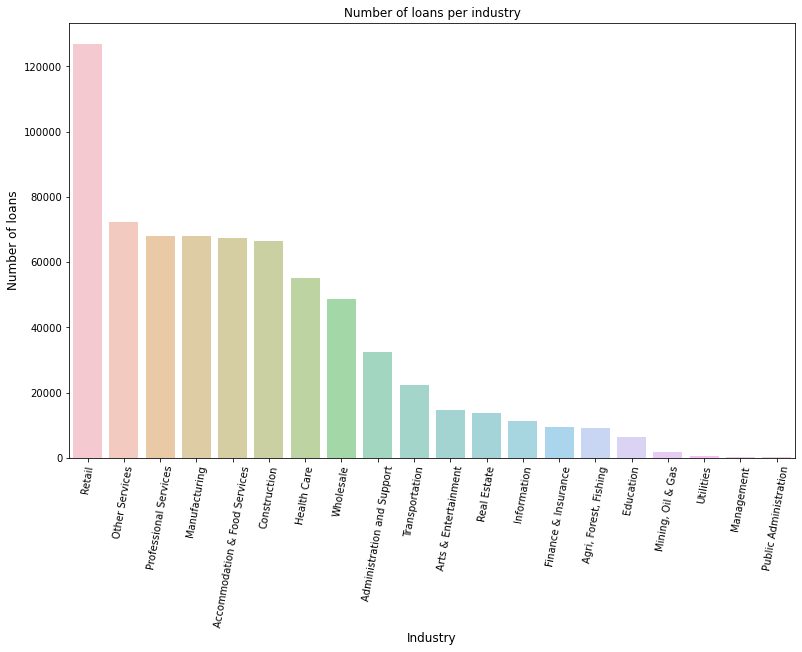

In [22]:
# Which sector is prominent reciepient
plt.figure(figsize=(13,8))
sectors = df1['industry'].value_counts()
sns.barplot (y=sectors.values, x=sectors.index, alpha=0.5)
plt.xlabel('Industry', fontsize=12)
plt.xticks(rotation=80)
plt.ylabel("Number of loans", fontsize=12)
plt.title("Number of loans per industry")
plt.show()


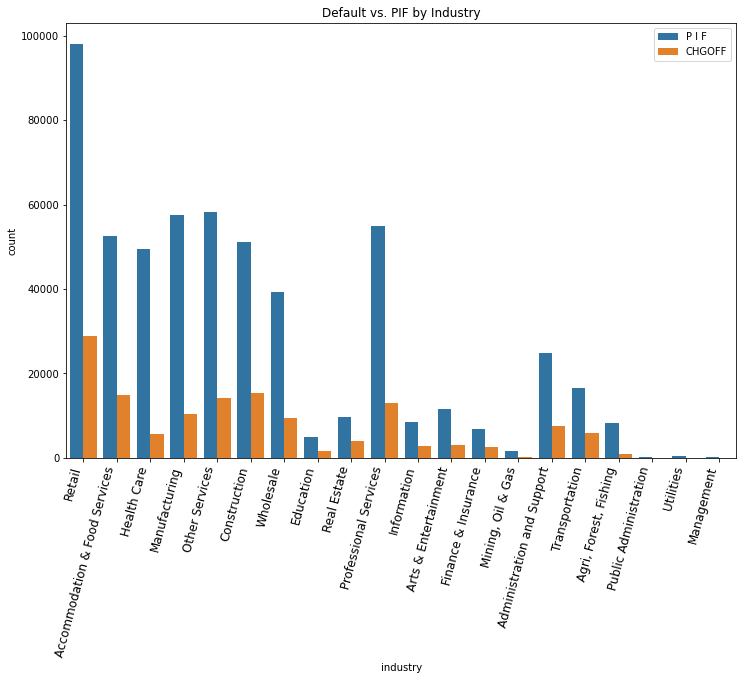

In [23]:
### loan default by sectors
plt.figure(figsize=(12,8))
sns.countplot(x="industry", hue="MIS_Status", data=df1)
plt.xticks(rotation=75,horizontalalignment='right', fontsize=12)
plt.title('Default vs. PIF by Industry')
plt.legend()
plt.show()

# Seems like retail industry is the prominent receipient and it is also has prominent default activities among others.
# It is an important indicator to explain the probability of being default. I will check out this later
# to classify this as a separate variable.

In [24]:
# What is the default vs PIF in terms of loan Term
# Term is in monthly format, changing to yearly for simplicity
df1.Term = df1.Term//12

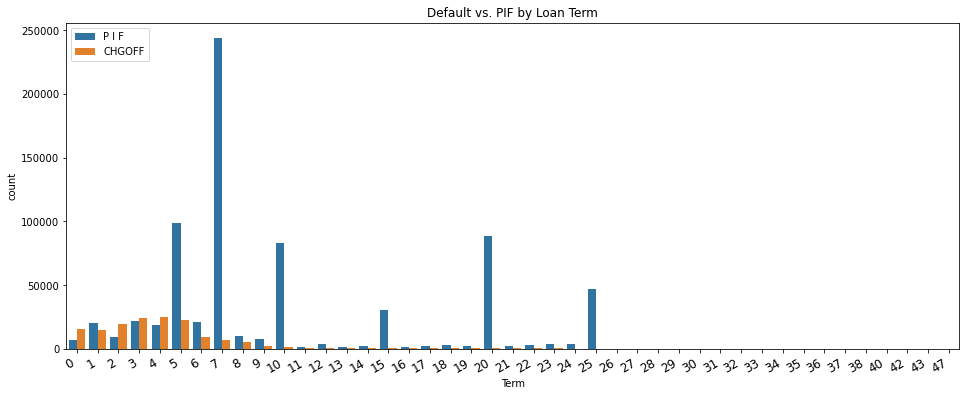

In [25]:
# plotting

plt.figure(figsize=(16, 6))
ax=sns.countplot(x='Term', hue='MIS_Status', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)
plt.title('Default vs. PIF by Loan Term')
plt.legend()
plt.show()

# we can see that there are some spikes intervals. That might be because of customary loan term.
# Most loan term are 5, 7, 10, 15, 20, 25 years. 


In [26]:
# lets change the format of MIS_Status to binary
Counter(df1.MIS_Status).keys()

dict_keys(['P I F', 'CHGOFF'])

In [27]:
df1['MIS_Status'].replace({'CHGOFF': 0, 'P I F':1}, inplace = True)

In [28]:
print(Counter(df1.MIS_Status).keys())
print(Counter(df1.MIS_Status).values())

dict_keys([1, 0])
dict_values([739609, 157558])


In [18]:
df1.columns

Index(['LoanNo', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross',
       'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'sector',
       'industry'],
      dtype='object')

In [29]:
# changing the Currency to float
#accessing col index
cols = ['ChgOffPrinGr', 'GrAppv', 'SBA_Appv','DisbursementGross',
       'BalanceGross']
[df1.columns.get_loc(i) for i in cols if i in df1]


[24, 25, 26, 21, 22]

In [30]:
# removing the $ sign from the specific index
col_index = [24, 25, 26, 21, 22]

for i in col_index:
    df1[df1.columns[i]] = df1[df1.columns[i]].replace('[\$,]', '',regex = True).astype(float) 

In [67]:
df1.head(2)

,LoanNo,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,7,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,1,0.0,60000.0,48000.0,45,Retail
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,5,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,1,0.0,40000.0,32000.0,72,Accommodation & Food Services


In [31]:
# change the date formate of ApprovalDate
df1['ApprovalDate'] = df1['ApprovalDate'].astype(str)
df1['ApprovalDate'] = pd.to_datetime(df1['ApprovalDate'])

In [32]:
print(Counter(df1.LowDoc).keys())
print(Counter(df1.LowDoc).values())
# seems like there are some errors

dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])
dict_values([110171, 780997, 758, 1, 2578, 603, 74, 495, 1490])


In [33]:
# change LowDoc to boolean icluding some missclassified as 0 1
df1['LowDoc'] = df1['LowDoc'].map({0:0, 1:1, 'N':0, 'Y':1})

In [18]:
df1.LowDoc.nunique()

2

In [34]:
# create new var with LowDoc = Yes condition for further exploration.

low_doc = df1[df1['LowDoc']==1]

In [35]:
low_doc['Term'].describe() 

count    110171.000000
mean          7.210273
std           3.849432
min           0.000000
25%           5.000000
50%           7.000000
75%           7.000000
max          42.000000
Name: Term, dtype: float64

In [36]:
print(Counter(low_doc.MIS_Status).keys())
print(Counter(low_doc.MIS_Status).values())

dict_keys([1, 0])
dict_values([100267, 9904])


In [37]:
#Checking approveamount
df1.GrAppv.describe()

count    8.971670e+05
mean     1.930595e+05
std      2.834331e+05
min      1.000000e+03
25%      3.500000e+04
50%      9.000000e+04
75%      2.250000e+05
max      5.472000e+06
Name: GrAppv, dtype: float64

C:\Anaconda_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



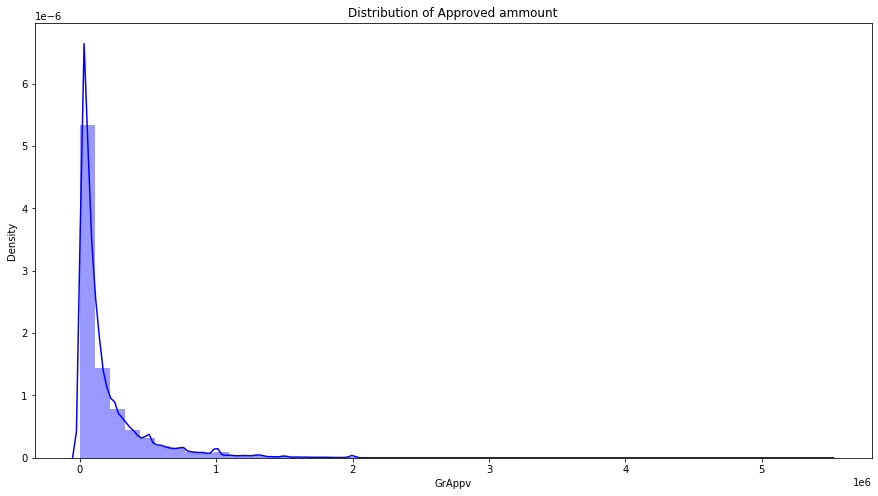

In [38]:
#plot GrAppv (gross amount approved)
plt.figure(figsize=(15, 8))
sns.distplot(df1.GrAppv, color="b")
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [39]:
# fixing the distribution of GrAppv

df1['GrAppv'] = np.log(df1['GrAppv'])

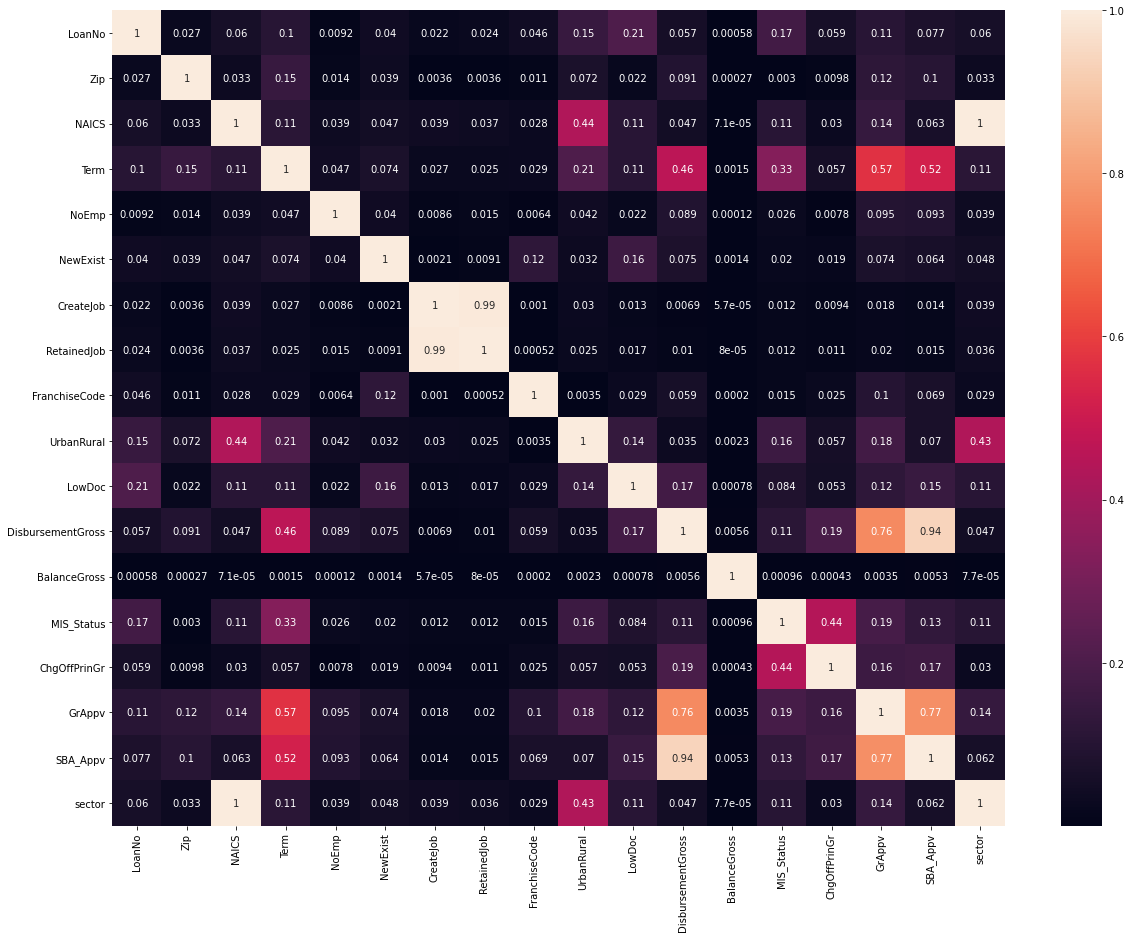

In [24]:
plt.subplots(figsize=(20, 15))
sns.heatmap(abs(df1.corr()), annot=True)
plt.show()

In [40]:
# checking unique of 'UrbanRural'
print(df1['UrbanRural'].unique())


[0 1 2]


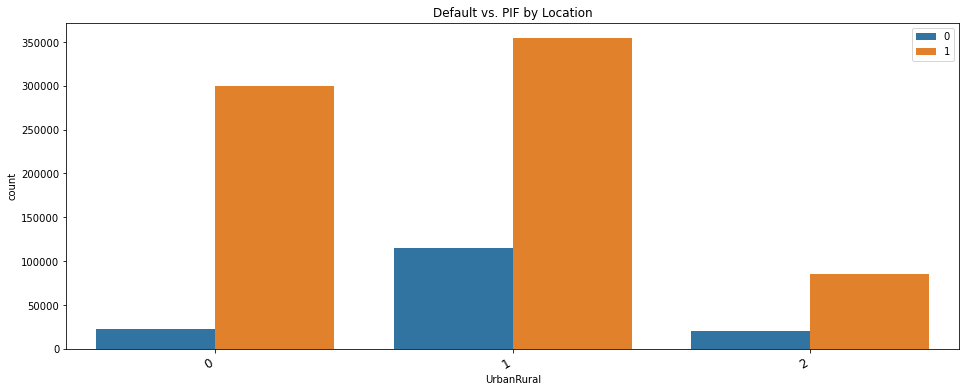

In [41]:
# plot ruralurban vs MIS_Status
plt.figure(figsize=(16, 6))
ax=sns.countplot(x='UrbanRural', hue='MIS_Status', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=12)
plt.title('Default vs. PIF by Location')
plt.legend()
plt.show()
# 1 = Urban, 2 = Rural, 0 = Undefined
# 1 = PIF, 0 = Default

In [36]:
# checking features
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897167 entries, 0 to 899163
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNo             897167 non-null  int64         
 1   Name               897153 non-null  object        
 2   City               897137 non-null  object        
 3   State              897154 non-null  object        
 4   Zip                897167 non-null  int64         
 5   Bank               895661 non-null  object        
 6   BankState          895654 non-null  object        
 7   NAICS              897167 non-null  int64         
 8   ApprovalDate       897167 non-null  datetime64[ns]
 9   ApprovalFY         897167 non-null  object        
 10  Term               897167 non-null  int64         
 11  NoEmp              897167 non-null  int64         
 12  NewExist           897033 non-null  float64       
 13  CreateJob          897167 non-null  int64   

In [79]:
Counter(df1['RevLineCr'])

Counter({'N': 419252,
         '0': 257431,
         'Y': 200660,
         'T': 15239,
         nan: 4520,
         '`': 11,
         ',': 1,
         '1': 23,
         'C': 2,
         '3': 1,
         '2': 6,
         'R': 14,
         '7': 1,
         'A': 1,
         '5': 1,
         '.': 1,
         '4': 1,
         '-': 1,
         'Q': 1})

In [42]:
# maping the revolving line of credit. I have included 0 and 1 as N and Y and rest to NaN
df1['RevLineCr'] = df1['RevLineCr'].map({'0':0, '1':1, 'N':0, 'Y':1})

In [43]:
print(df1.RevLineCr.value_counts())
print(df1.RevLineCr.isnull().sum())

0.0    676683
1.0    200683
Name: RevLineCr, dtype: int64
19801


In [44]:
print(df1.RevLineCr.unique())
print(df1.RevLineCr.dtype)


[ 0.  1. nan]
float64


In [45]:
print(df1.NewExist.unique())

[ 2.  1.  0. nan]


In [46]:
# checking NewExists
# 0 exists which is not defined 
print(Counter(df1['NewExist']))

Counter({1.0: 643446, 2.0: 252559, 0.0: 1028, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, na

In [47]:
# convert values other than 1 & 2 to null.

df1['NewExist'] = df1['NewExist'].map({1:1, 2:2})

In [48]:
print(df1.NewExist.unique())
print('\n')
print(df1.NewExist.value_counts())

[ 2.  1. nan]


1.0    643446
2.0    252559
Name: NewExist, dtype: int64


### Retained/ created job/ franchise code

In [49]:
df1.RetainedJob.value_counts()

0       439973
1        88264
2        76554
3        49796
4        39551
         ...  
198          1
1300         1
685          1
274          1
305          1
Name: RetainedJob, Length: 357, dtype: int64

In [50]:
df1.CreateJob.value_counts()

0       627614
1        63005
2        57753
3        28776
4        20493
         ...  
195          1
190          1
189          1
186          1
1530         1
Name: CreateJob, Length: 246, dtype: int64

In [51]:
df1.FranchiseCode.value_counts()

1        637395
0        208040
78760      3373
68020      1921
50564      1034
          ...  
45953         1
21605         1
14225         1
77746         1
25366         1
Name: FranchiseCode, Length: 2767, dtype: int64

After looking at the values, zero is the prominent value in all case. I would like to take into account CreateJob and exclude Retain job as they are strongly correlated(from heatmap). Also, would be a better way to make dummy classifier in both CreateJob and FranchiseCode.


In [53]:
#creating dummy classifier 

df1['FranchiseCode'] = np.where(df1['FranchiseCode'] > 1, 1, 0) # 0 or 1 NoFranchise or Franchise
df1['CreateJob'] = np.where(df1['CreateJob'] > 1, 1, 0) # 0 or 1  Not created a job or created a job

In [54]:
df1.head(40)

,LoanNo,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,7,4,2.0,0,0,0,0,0.0,1.0,NaN,28-Feb-99,60000.0,0.0,1,0.0,11.002100,48000.0,45,Retail
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,5,2,2.0,0,0,0,0,0.0,1.0,NaN,31-May-97,40000.0,0.0,1,0.0,10.596635,32000.0,72,Accommodation & Food Services
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,15,7,1.0,0,0,0,0,0.0,0.0,NaN,31-Dec-97,287000.0,0.0,1,0.0,12.567237,215250.0,62,Health Care
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,5,2,1.0,0,0,0,0,0.0,1.0,NaN,30-Jun-97,35000.0,0.0,1,0.0,10.463103,28000.0,0,NaN
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,20,14,1.0,1,7,0,0,0.0,0.0,NaN,14-May-97,229000.0,0.0,1,0.0,12.341477,229000.0,0,NaN
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,1997,10,19,1.0,0,0,0,0,0.0,0.0,NaN,30-Jun-97,517000.0,0.0,1,0.0,13.155798,387750.0,33,Manufacturing
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,1980-06-02,1980,3,45,2.0,0,0,0,0,0.0,0.0,24-Jun-91,22-Jul-80,600000.0,0.0,0,208959.0,13.304685,499998.0,0,NaN
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,1997,7,1,2.0,0,0,0,0,0.0,1.0,NaN,30-Jun-98,45000.0,0.0,1,0.0,10.714418,36000.0,81,Other Services
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,1997-02-28,1997,24,2,2.0,0,0,0,0,0.0,0.0,NaN,31-Jul-97,305000.0,0.0,1,0.0,12.628067,228750.0,72,Accommodation & Food Services
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,1997-02-28,1997,7,3,2.0,0,0,0,0,0.0,1.0,NaN,30-Apr-97,70000.0,0.0,1,0.0,11.156251,56000.0,0,NaN


### States and MIS_Status

In [74]:
#import data
default_rate = pd.read_csv('https://raw.githubusercontent.com/sunil-20/sba_map/main/Default_Rate_US.csv')

In [75]:
default_rate.head()

,State,Defaulters
0,AK,11.693716
1,AL,16.614833
2,AR,16.800884
3,AZ,20.750113
4,CA,18.515113


In [76]:
default_rate['ln_default'] = np.log10(default_rate['Defaulters'])

In [77]:
us_states = json.load(open('states.geojson','r'))

In [78]:
# maping
state_id_map = {}
for feature in us_states['features']:
    feature['STUSPS']=feature['properties']['STUSPS']
    state_id_map[feature["properties"]["NAME"]] = feature["STUSPS"]

In [79]:
#fig = px.choropleth(default_rate, locations='STUSPS',geojson = us_states, color = 'Default', scope = 'usa')
fig = px.choropleth(default_rate, locations='State',geojson = us_states,locationmode='USA-states', color = 'Defaulters', scope= 'usa')
fig.update_geos(fitbounds = 'locations',visible = False)

fig.update_layout(title_text = 'Defaulters by state')
fig.update_layout(title={'x':0.4,'xanchor':'center'})
fig.show()

In [142]:
#print default rate according to state
default_rate.sort_values(by=['MIS_Status'], ascending= False)

,MIS_Status
State,
FL,27.369392
DC,23.992560
GA,23.962823
NV,23.223635
IL,22.670136
MI,22.505246
TN,21.212766
AZ,20.750113
SC,20.464701


From EDA it is clear that there is variance among states as well as industry to be default. So, considering their importance in predicting default, the better approach is to make a new  class of variable to make the context more understandable. 

In [81]:
# Change the States code to three levels considering their high, med or low risk of being default

df1['State_default'] = df1['State'].map({'FL':2, 'GA':2, 'DC':2, 'NV':2, 'IL':2, 'MI':2, 'TN':2, 'AZ':2, 'NJ':2,
                                'SC':2,'NY':2, 'MD':2, 'KY':2, 'NC':2, 'TX':2, 'VA':2, 'CA':2, 'LA':2,
                                'DE':1, 'CO':1, 'UT':1, 'IN':1, 'AR':1, 'AL':1, 'OH':1, 'WV':1, 'MS':1, 
                                'OK':1, 'OR':1, 'HI':1, 'MO':1, 'PA':1, 'ID':1, 'CT':1, 'WA':1, 'MA':1, 'KS':1, 
                                'WI':1, 'MN':1, 'IA':1, 'RI':1, 'AK':1, 'NE':1, 'NM':1, 'NH':1, 
                                'ME':0, 'SD':0, 'ND':0, 'VT':0, 'WY':0,'MT':0})
#high = 18
#mid = 27
#low = 6

In [82]:
df1.State_default.value_counts()

2.0    496140
1.0    368404
0.0     32610
Name: State_default, dtype: int64

In [50]:
#Let's see about the sector
pd.DataFrame((1- df1.groupby('State').mean()['MIS_Status'])*100)

,MIS_Status
State,
AK,11.693716
AL,16.614833
AR,16.800884
AZ,20.750113
CA,18.515113
CO,17.822119
CT,14.043044
DC,23.992560
DE,17.966256


In [51]:
sector_rate = pd.DataFrame((1-df1.groupby('sector').mean()['MIS_Status'])*100)

In [52]:
sector_rate.sort_values(by=['MIS_Status'], ascending= False)

,MIS_Status
sector,
53,28.731233
52,28.426610
48,26.888801
51,24.828375
61,24.246212
56,23.551293
45,23.415393
23,23.255429
49,22.986425


In [83]:
# Classifying the industry according to the probability of being default
df1['Industry_default'] = df1['sector'].map({53:2, 52:2, 48:2, 51:2, 61:2, 56:2, 45:2, 23:2, 49:2, 44:2, 
                                    72:2, 71:2, 81:1, 42:1, 31:1, 54:1, 32:1, 92:1, 22:1, 33:1,
                                    62:1, 55:1, 11:0, 21:0, 0:0})

In [142]:
# adding GDP as one of the prominent variable to predict default rate
df_gdp = pd.read_csv('E:/Bootcamp/Thinkful/Thinkful Modules/23 Capstone Supervised Learning/Data/US_GDP.csv')

In [143]:
df_gdp.head()

,ApprovalFY,GDP
0,1962,603.9
1,1963,637.5
2,1964,684.5
3,1965,742.3
4,1966,813.4


In [144]:
df1['ApprovalFY'].describe()

count    897167.000000
mean       2001.139677
std           5.912461
min        1966.000000
25%        1997.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalFY, dtype: float64

In [145]:
print(df1['ApprovalFY'].unique())
#There is A in the data. 

[1997 1980 2006 1998 1999 2000 2001 1972 2003 2004 1978 1979 1981 2005
 1982 1966 1983 1973 1984 2007 1985 1986 1987 2008 1988 2009 1989 1991
 1990 1974 2010 2011 1992 1993 2002 2012 2013 1994 2014 1975 1977 1976
 1968 1969 1995 1970 1996 1971]


In [146]:
# Convert ApprovalFY mis-spelt values 1976A to 1976
df1.loc[df1['ApprovalFY']=='1976A','ApprovalFY']='1976'  
df1['ApprovalFY'] = df1['ApprovalFY'].astype(int)

In [147]:
df1['ApprovalFY'].describe()

count    897167.000000
mean       2001.139677
std           5.912461
min        1966.000000
25%        1997.000000
50%        2002.000000
75%        2006.000000
max        2014.000000
Name: ApprovalFY, dtype: float64

In [148]:
# Merge GDP to current dataframe
df_merge = df1.merge(df_gdp, how='left', on='ApprovalFY')


In [149]:
df_merge.head()

,LoanNo,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,sector,industry,State_default,Industry_default,GDP
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,7,4,2.0,0,0,0,0,0.0,1.0,NaN,28-Feb-99,60000.0,0.0,1,0.0,11.002100,48000.0,45,Retail,1.0,2,8577.6
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,5,2,2.0,0,0,0,0,0.0,1.0,NaN,31-May-97,40000.0,0.0,1,0.0,10.596635,32000.0,72,Accommodation & Food Services,1.0,2,8577.6
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,15,7,1.0,0,0,0,0,0.0,0.0,NaN,31-Dec-97,287000.0,0.0,1,0.0,12.567237,215250.0,62,Health Care,1.0,1,8577.6
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,5,2,1.0,0,0,0,0,0.0,1.0,NaN,30-Jun-97,35000.0,0.0,1,0.0,10.463103,28000.0,0,NaN,1.0,0,8577.6
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,20,14,1.0,1,7,0,0,0.0,0.0,NaN,14-May-97,229000.0,0.0,1,0.0,12.341477,229000.0,0,NaN,2.0,0,8577.6


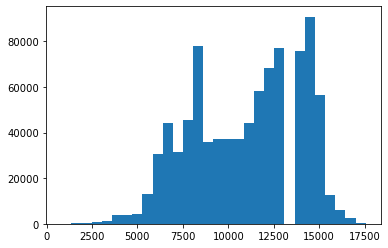

In [150]:
fig = plt.hist(df_merge['GDP'], bins= 30)
plt.show()

In [151]:
# change the variable to log

df_merge['GDP']=np.log(df_merge['GDP'])


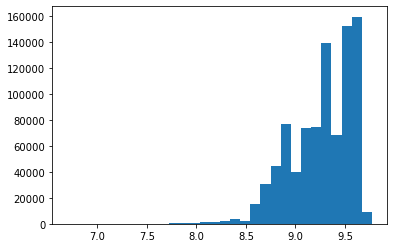

In [152]:
fig = plt.hist(df_merge['GDP'], bins= 30)
plt.show()

### Time frame

Considering the maturity of loan- customary practice 5 years or more- will provide more weight to the charge off comparing to the PIF. 
Charge off - prior to maturity date
PIF - at the maturity date of the loan
So, considering the selection bias loan after 2010 has been excluded from the analysis to power the predictive model.

In [153]:
df_mrg = df_merge[df_merge['ApprovalFY']<=2010]

In [154]:
df_mrg['ApprovalFY'].value_counts()

2005    76958
2006    75756
2007    71649
2004    68195
2003    58000
1995    45688
2002    44307
1996    40021
2008    39458
1997    37718
2000    37352
1999    37348
2001    37317
1998    36005
1994    31584
1993    23299
1992    20875
2009    19103
2010    16828
1991    15660
1990    14859
1989    13245
1987     2218
1986     2118
1984     2019
1985     1941
1988     1898
1983     1682
1982      719
1981      602
1980      453
1979      349
1978      239
1977      137
1976       83
1973       49
1974       42
1975       29
1972       25
1971       18
1970        8
1969        3
1968        1
1966        1
Name: ApprovalFY, dtype: int64

In [155]:
# I would like to remove the years 1970,1969,1968,1966 as the number of observation is not good enough.
df_mrg = df_merge[df_merge['ApprovalFY']>=1971]

In [156]:
df_mrg.shape

(897154, 32)

<AxesSubplot:>

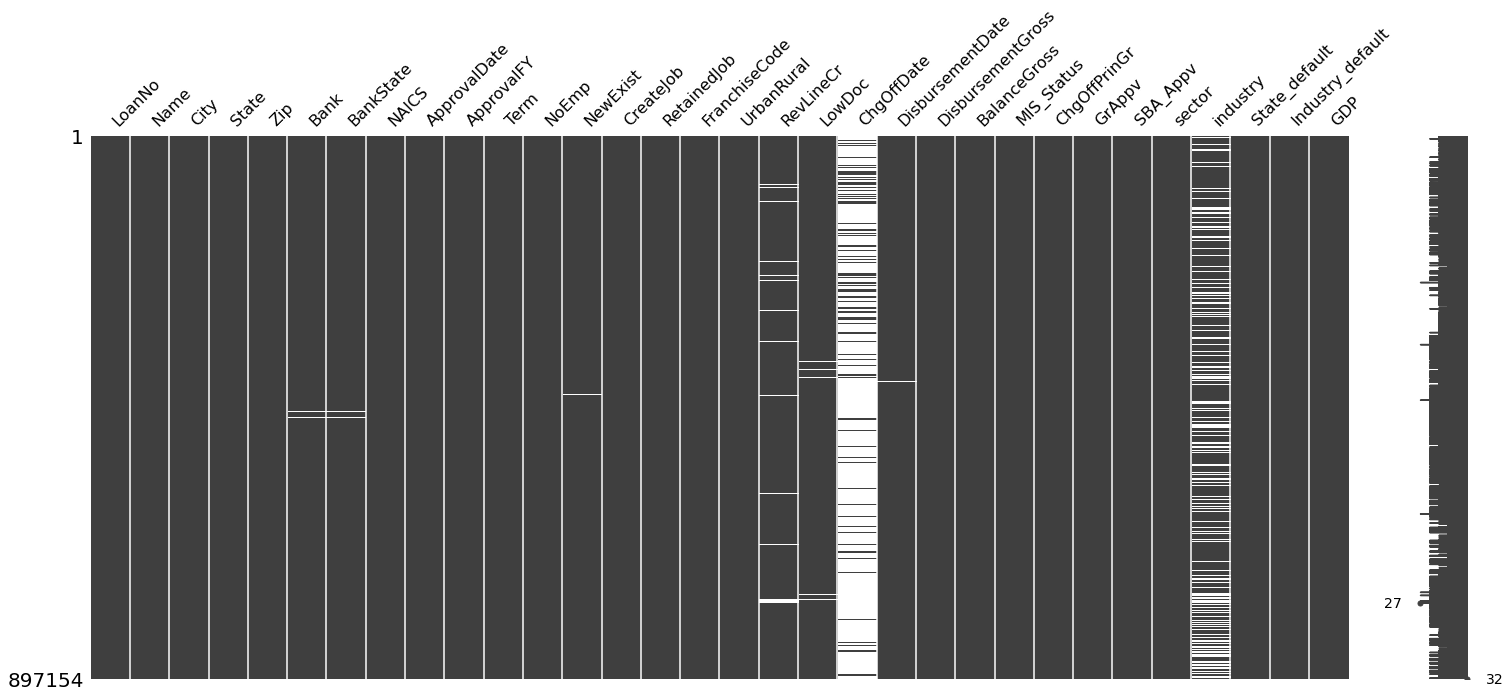

In [157]:
# Lets visualise the missing values in the df again
msno.matrix(df_mrg)

In [158]:
# drop the variable that are not relevant for further analysis

df_mrg = df_mrg.drop(axis =1, columns = ['LoanNo','Name', 'City','Zip','Bank', 'BankState','NAICS','ApprovalDate','ChgOffDate','DisbursementDate','DisbursementGross','BalanceGross', 'ChgOffPrinGr'])

# drop GrAppv too

In [159]:
df_mrg.shape

(897154, 19)

In [160]:
df_mrg.head(2)

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,sector,industry,State_default,Industry_default,GDP
0,IN,1997,7,4,2.0,0,0,0,0,0.0,1.0,1,11.002100,48000.0,45,Retail,1.0,2,9.056909
1,IN,1997,5,2,2.0,0,0,0,0,0.0,1.0,1,10.596635,32000.0,72,Accommodation & Food Services,1.0,2,9.056909


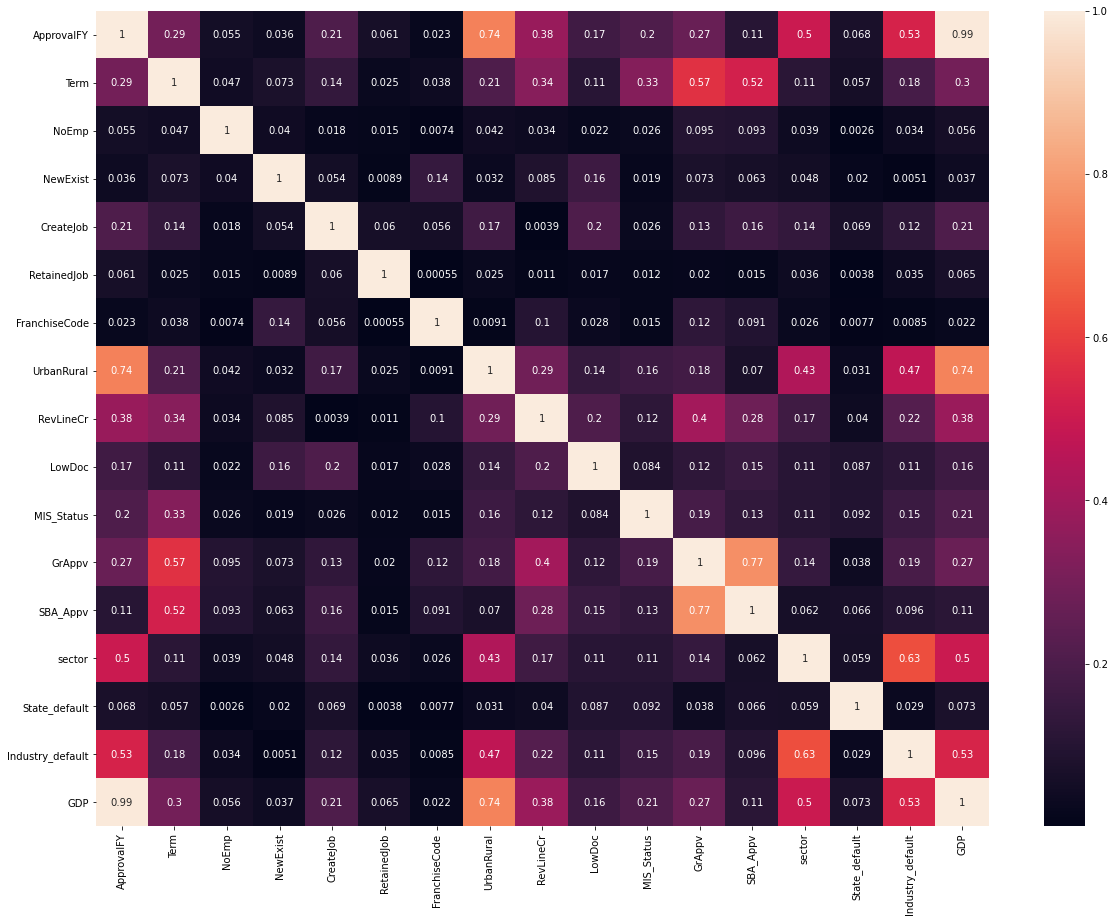

In [161]:
plt.subplots(figsize=(20, 15))
sns.heatmap(abs(df_mrg.corr()), annot=True)
plt.show()

In [162]:
# looking at Corr matrix, I have decided to remove GrAppv and retain SBA_Appv
df_mrg = df_mrg.drop(axis =1, columns = ['GrAppv'])


In [163]:
# df drop industry
df_mrg = df_mrg.drop(axis =1, columns = ['industry'])

<AxesSubplot:>

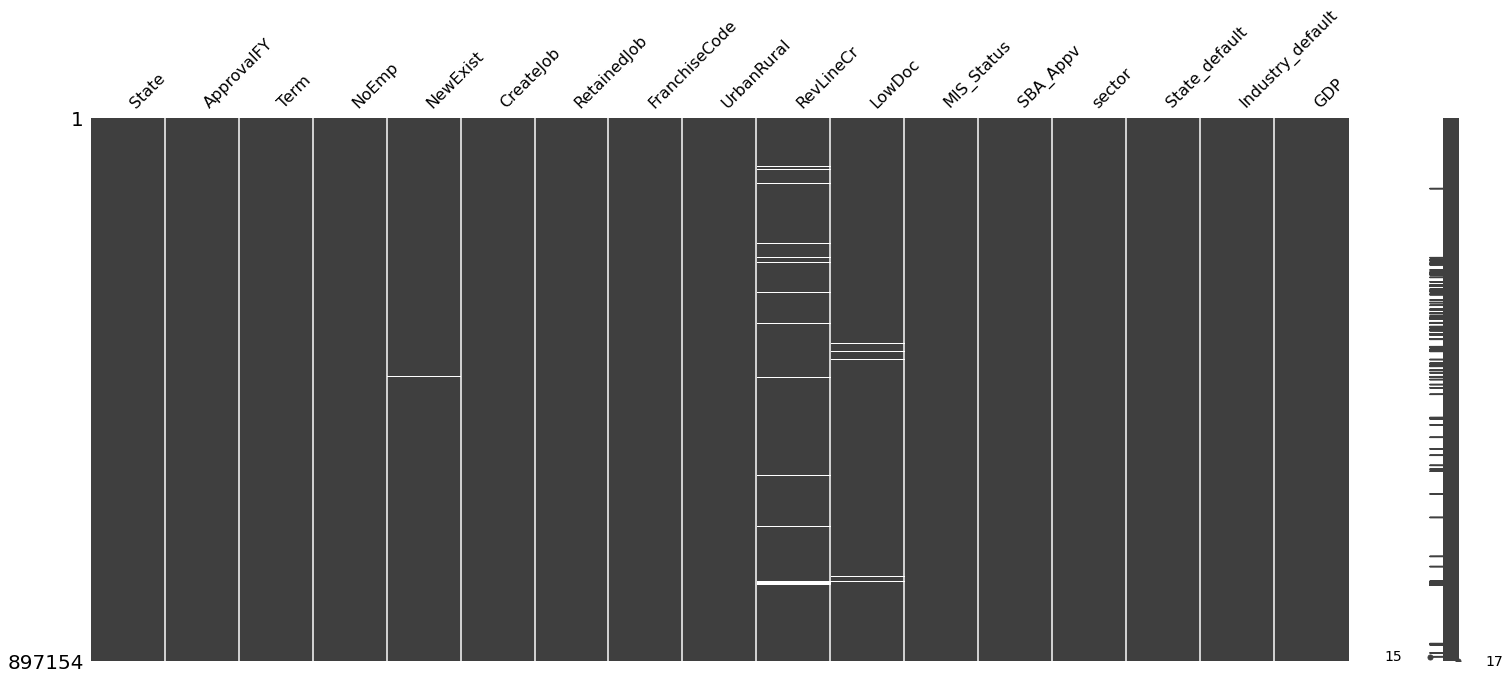

In [164]:
# Lets visualise the missing values in the df again
msno.matrix(df_mrg)

In [165]:
df_mrg.isna().sum().sort_values(ascending = False)

RevLineCr           19801
LowDoc               5999
NewExist             1158
State                  12
State_default          12
Industry_default        0
sector                  0
SBA_Appv                0
MIS_Status              0
UrbanRural              0
ApprovalFY              0
FranchiseCode           0
RetainedJob             0
CreateJob               0
NoEmp                   0
Term                    0
GDP                     0
dtype: int64

In [166]:
# checking the RevLineCr
# create condition
cond_rev = df_mrg[(df_mrg['RevLineCr'] != 1) & (df_mrg['RevLineCr'] != 0)]
Counter(cond_rev.MIS_Status).values()

dict_values([13128, 6673])

In [167]:
# checking for further pattern with RevLineCr
RevLine_yes = df_mrg[df_mrg['RevLineCr'] == 1]
RevLine_no = df_mrg[df_mrg['RevLineCr'] == 0]

In [168]:
RevLine_no.NoEmp.describe()

count    676670.000000
mean         12.856150
std          81.965084
min           0.000000
25%           2.000000
50%           5.000000
75%          12.000000
max        9999.000000
Name: NoEmp, dtype: float64

In [169]:
RevLine_yes.NoEmp.describe()

count    200683.000000
mean          6.855414
std          39.998460
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        8000.000000
Name: NoEmp, dtype: float64

In [170]:
# df drop RevLineCr
# there is no clear pattern of RevLineCr and many null

df_mrg = df_mrg.drop(axis =1, columns = ['RevLineCr'])

In [171]:
#LowDoc

cond_low = df_mrg[(df_mrg['LowDoc'] != 1) & (df_mrg['LowDoc'] != 0)]
cond_low
#5327 rows

,State,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,MIS_Status,SBA_Appv,sector,State_default,Industry_default,GDP
7396,WI,2006,20,130,1.0,0,130,0,2,NaN,1,1306000.0,33,1.0,1,9.533554
23325,NM,2006,10,7,2.0,0,0,0,1,NaN,1,120000.0,72,1.0,2,9.533554
30636,TX,2006,10,5,2.0,0,0,1,1,NaN,1,141750.0,72,2.0,2,9.533554
35432,OH,2006,21,2,2.0,0,0,0,1,NaN,1,900000.0,81,1.0,1,9.533554
36058,VA,2005,6,1,1.0,1,1,0,2,NaN,1,125000.0,48,2.0,2,9.475715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884350,TX,2006,5,16,1.0,0,0,0,1,NaN,1,150000.0,54,2.0,1,9.533554
884377,TX,2006,7,71,1.0,0,0,0,1,NaN,1,1500000.0,32,2.0,1,9.533554
885824,TX,2006,20,15,1.0,1,0,0,1,NaN,1,131000.0,23,2.0,2,9.533554
889838,TX,2006,7,3,2.0,0,0,0,1,NaN,1,114750.0,62,2.0,1,9.533554


In [172]:
# check MIS_Status vs LowDoc Condition
Counter(cond_low.MIS_Status).values()
#PIF = 3891
#Default = 1436


dict_values([4422, 1577])

In [173]:
#Is there any pattern with regards to LowDoc and non-LowDoc loans

low_doc = df_mrg[df_mrg['LowDoc'] == 1]


In [174]:
# what is term's relation with LowDoc
low_doc['Term'].describe()
#75% have 7 years of term

count    110171.000000
mean          7.210273
std           3.849432
min           0.000000
25%           5.000000
50%           7.000000
75%           7.000000
max          42.000000
Name: Term, dtype: float64

In [175]:
# what about Gross approved amount and LowDoc

low_doc['SBA_Appv'].describe()

# 75% have $80000  approved

count     110171.000000
mean       57127.306514
std        31261.343809
min         1600.000000
25%        32000.000000
50%        51521.000000
75%        80000.000000
max      1000000.000000
Name: SBA_Appv, dtype: float64

In [176]:
# I didn't see any way to impute the column values. So, dropping the null values
df_mrg.dropna(subset=['LowDoc'], inplace= True)

In [177]:
df_mrg.isna().sum().sort_values(ascending = False)

NewExist            1149
State                 12
State_default         12
ApprovalFY             0
Term                   0
NoEmp                  0
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
LowDoc                 0
MIS_Status             0
SBA_Appv               0
sector                 0
Industry_default       0
GDP                    0
dtype: int64

In [178]:
# lets drop the null values from NewExist
df_mrg.dropna(subset=['NewExist'], inplace= True)

In [179]:
# still 12 null in State_default
df_mrg.dropna(subset=['State_default'], inplace= True)

In [180]:
df_mrg.shape

(889994, 16)

## Splitting the data

In [181]:
df_mrg.columns

Index(['State', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'MIS_Status',
       'SBA_Appv', 'sector', 'State_default', 'Industry_default', 'GDP'],
      dtype='object')

In [182]:
# X and y variables
X = df_mrg[['Term', 'NoEmp', 'NewExist','CreateJob','RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'SBA_Appv', 'State_default', 'Industry_default', 'GDP']]
y = df_mrg['MIS_Status']

In [183]:
#split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

Mean F1 score: 0.914
| Train Accurac 0.8493217177656761 
| Test Accuracy: 0.8500757306774412 
| ROC_AUC_Score: 0.8461377520003639 
| Execution time: 0.30318784713745117
              precision    recall  f1-score   support

           0       0.67      0.28      0.40     38926
           1       0.86      0.97      0.91    183573

    accuracy                           0.85    222499
   macro avg       0.77      0.63      0.66    222499
weighted avg       0.83      0.85      0.82    222499



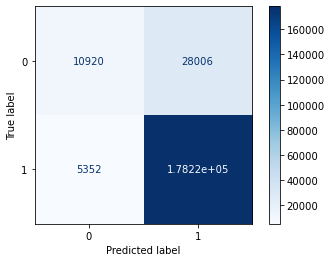

In [184]:
# logistic regression without balancing the data
def results(model):
    """Returns metric scores, a classification report, and a confusion matrix."""
    time_start = time.time()
    y_test_pred = model.predict(X_test)
    print('| Train Accurac', model.score(X_train, y_train),
          '\n| Test Accuracy:', model.score(X_test, y_test),
          '\n| ROC_AUC_Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
          '\n| Execution time: {}'.format(time.time() - time_start))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, values_format='.5g', cmap='Blues')
    plt.show()
    

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logit', LogisticRegression(max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

Mean F1 score: 0.810
| Train Accurac 0.7281118210623301 
| Test Accuracy: 0.727643719747055 
| ROC_AUC_Score: 0.8420899810867184 
| Execution time: 0.3117799758911133
              precision    recall  f1-score   support

           0       0.37      0.83      0.52     38926
           1       0.95      0.71      0.81    183573

    accuracy                           0.73    222499
   macro avg       0.66      0.77      0.66    222499
weighted avg       0.85      0.73      0.76    222499



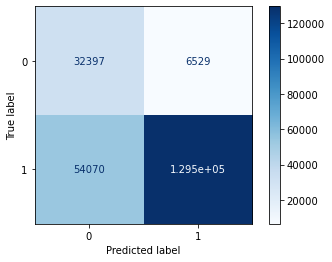

In [185]:
#Cost-Sensitive Logistic Regression for imbalanced classes

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logit', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

### Which variable is important

I have chosen variables according to domain knowledge and correlation matrix. Now lets see which variable are important using the RandomForestClassifier


In [186]:
clf = RandomForestClassifier(max_depth= 10, random_state=10)
clf.fit(X,y)

feat_imp = pd.Series(clf.feature_importances_, index = X.columns)
features = feat_imp.nlargest(10)
print(features)

Term                0.613627
GDP                 0.186954
SBA_Appv            0.072569
UrbanRural          0.032391
RetainedJob         0.025457
State_default       0.023903
NoEmp               0.013475
Industry_default    0.011360
NewExist            0.007408
LowDoc              0.005866
dtype: float64


<AxesSubplot:>

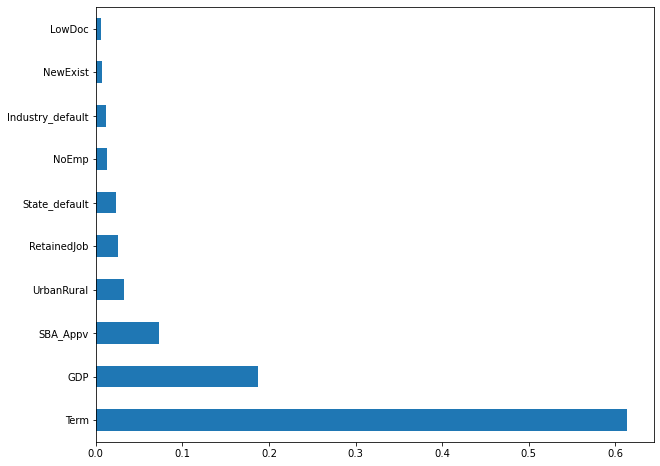

In [187]:
#print the important features as bar plot
fig = plt.figure(figsize = (10,8))
features.plot(kind='barh')

In [198]:
#New features 

X = df_mrg[['Term', 'NoEmp', 'UrbanRural','SBA_Appv', 'State_default', 'Industry_default', 'GDP']]
y = df_mrg['MIS_Status']

Mean F1 score: 0.740
Train Accuracy: 0.73102920187944 
Test Accuracy: 0.7319916613213598 
ROC_AUC_Score: 0.8002836415324478 
Execution time: 0.07276105880737305
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     31048
           1       0.72      0.76      0.74     31312

    accuracy                           0.73     62360
   macro avg       0.73      0.73      0.73     62360
weighted avg       0.73      0.73      0.73     62360



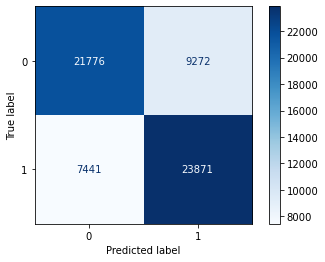

In [199]:
# logistic regression with new features and balanced
def results(model):
    """Returns metric scores, a classification report, and a confusion matrix."""
    time_start = time.time()
    y_test_pred = model.predict(X_test)
    print('Train Accuracy:', model.score(X_train, y_train),
          '\nTest Accuracy:', model.score(X_test, y_test),
          '\nROC_AUC_Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
          '\nExecution time: {}'.format(time.time() - time_start))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, values_format='.5g', cmap='Blues')
    plt.show()
    
#Cost-Sensitive Logistic Regression for imbalanced classes

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logit', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

## Undersampling to balance the sample

In [200]:
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)

In [201]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 155898, 1: 155898})


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=44)

Mean F1 score: 0.739
Train Accuracy 0.7312537083660738 
Test Accuracy: 0.7321840923669019 
ROC_AUC_Score: 0.8002744106838644 
Execution time: 0.31606292724609375
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     31048
           1       0.72      0.76      0.74     31312

    accuracy                           0.73     62360
   macro avg       0.73      0.73      0.73     62360
weighted avg       0.73      0.73      0.73     62360



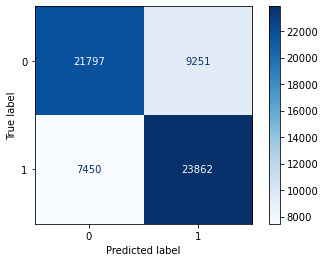

In [211]:
def results(model):
    """Returns metric scores, a classification report, and a confusion matrix."""
    time_start = time.time()
    y_test_pred = model.predict(X_test)
    print('Train Accuracy', model.score(X_train, y_train),
          '\nTest Accuracy:', model.score(X_test, y_test),
          '\nROC_AUC_Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
          '\nExecution time: {}'.format(time.time() - time_start))
    print(classification_report(y_test, y_test_pred))
    plot_confusion_matrix(model, X_test, y_test, values_format='.5g', cmap='Blues')
    plt.show()
    

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logit', LogisticRegression(max_iter=1000))
])
pipe.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipe, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

print('Mean F1 score: %.3f' %(scores.mean()))
results(pipe)

## Boosting model

In [208]:
#Gradient boosting classifier
gbr = GradientBoostingClassifier(random_state = 44)
gbr.fit(X_train, y_train)
pred = gbr.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
display(pd.DataFrame({'Variable':X_train.columns,
              'Importance':gbr.feature_importances_}).sort_values('Importance', ascending=False).head(10))
print('ROC_AUC:{:.3f}'.format(roc_auc_score(y_test, gbr.predict_proba(X_test)[:,1])))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     31048
           1       0.87      0.81      0.84     31312

    accuracy                           0.84     62360
   macro avg       0.84      0.84      0.84     62360
weighted avg       0.84      0.84      0.84     62360

[[27167  3881]
 [ 5948 25364]]


,Variable,Importance
0,Term,0.621203
3,SBA_Appv,0.220491
6,GDP,0.130492
4,State_default,0.012397
1,NoEmp,0.010493
2,UrbanRural,0.003868
5,Industry_default,0.001056


ROC_AUC:0.916


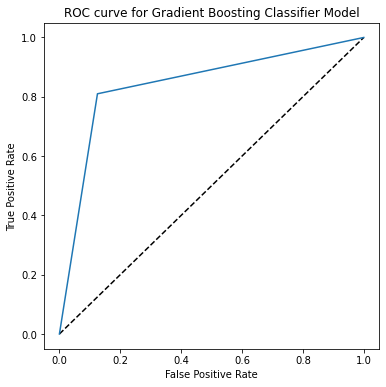

In [210]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Gradient Boosting Classifier Model')
plt.show()


Model Evaluation

We'll need to focus on select metrics, by which to evaluate the efficacy of our models. ROC_AUC score initially comes to mind because, the closer the score is 1, the better our model is doing classifying True Positives and False Positives.

However, we have to consider the stakes at hand. A False Negative presents the largest opportunity cost for both the lender and the Small Business Administration. Our model not being able to successfully predict whether a loan will default has greater consequences, than if our model predicts a loan for default when it never would have(False Positive).

Therefore, the F1 score would take into consideration false negatives, because it is a harmonious mean of precision and recall. Therefore, that will be our metric of evaluation for our models.

We will be using a RepeatedStratifiedKfold, in order to address the class imbalance. Stratification allows us to conduct random sampling in order to maintain the class-label proportion across the different folds.

We'll also generate a classification report for each model.
